<a href="https://colab.research.google.com/github/jjlee0625/National-Apartment-Presale-Price-Analysis/blob/master/%EC%A0%84%EA%B5%AD_%EC%95%84%ED%8C%8C%ED%8A%B8_%EB%B6%84%EC%96%91%EA%B0%80%EA%B2%A9_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np 
import re 
from plotnine import *

In [ ]:
df = pd.read_csv('/content/주택도시보증공사 전국 평균 분양가격(2020년 3월).csv')

In [ ]:
df.shape

(4590, 5)

In [ ]:
df.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [ ]:
df.tail()

,지역명,규모구분,연도,월,분양가격(㎡)
4585,제주,전체,2020,3,3955
4586,제주,전용면적 60㎡이하,2020,3,4039
4587,제주,전용면적 60㎡초과 85㎡이하,2020,3,3962
4588,제주,전용면적 85㎡초과 102㎡이하,2020,3,NaN
4589,제주,전용면적 102㎡초과,2020,3,3601


In [ ]:
df.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    305
dtype: int64

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50669 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47749 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44508 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47784 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_

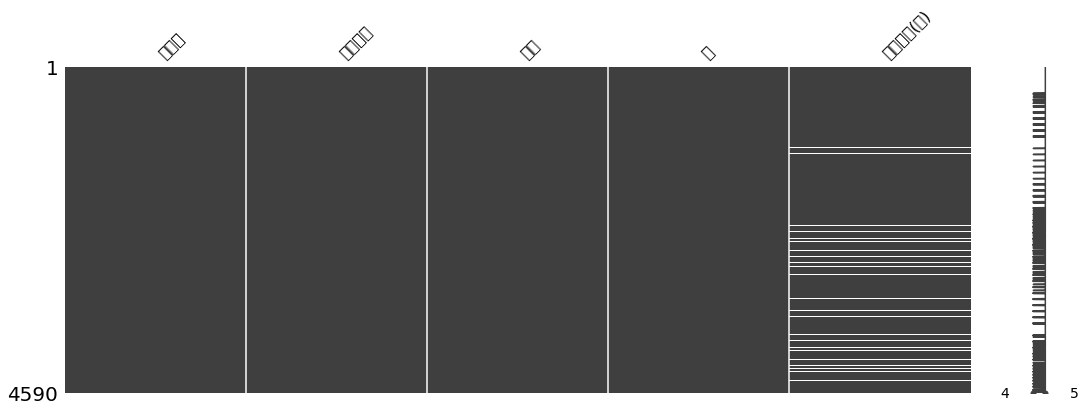

In [ ]:
import missingno as msno 
msno.matrix(df, figsize=(18,6))

In [ ]:
df['연도'] = df['연도'].astype(str)
df['월'] = df['월'].astype(str)

In [ ]:
df_price = df['분양가격(㎡)']

In [ ]:
df['분양가격'] = pd.to_numeric(df_price, errors='coerce') 
df['평당분양가격'] = df['분양가격'] * 3.3

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4590 entries, 0 to 4589
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      4590 non-null   object 
 1   규모구분     4590 non-null   object 
 2   연도       4590 non-null   object 
 3   월        4590 non-null   object 
 4   분양가격(㎡)  4285 non-null   object 
 5   분양가격     4184 non-null   float64
 6   평당분양가격   4184 non-null   float64
dtypes: float64(2), object(5)
memory usage: 251.1+ KB


In [ ]:
df.describe()

,분양가격,평당분양가격
count,4184.000000,4184.000000
mean,3271.654876,10796.461090
std,1302.987924,4299.860149
min,1868.000000,6164.400000
25%,2457.500000,8109.750000
50%,2894.000000,9550.200000
75%,3601.250000,11884.125000
max,13835.000000,45655.500000


In [ ]:
df.describe(include=[np.object])

,지역명,규모구분,연도,월,분양가격(㎡)
count,4590,4590,4590,4590,4285
unique,17,5,6,12,1813
top,인천,전체,2016,1,3395
freq,270,918,1020,425,18


In [ ]:
df_2018 = df.loc[df['연도'] == '2018']
df_2018.shape

(1020, 7)

In [ ]:
df['규모구분'].value_counts()

전체                   918
전용면적 60㎡초과 85㎡이하     918
전용면적 85㎡초과 102㎡이하    918
전용면적 102㎡초과          918
전용면적 60㎡이하           918
Name: 규모구분, dtype: int64

In [ ]:
pd.options.display.float_format = '{:,.0f}'.format 
df.groupby(df.연도).describe().T

연도             2015   2016   2017   2018   2019   2020
분양가격   count    243    984    899    919    912    227
       mean   2,789  2,934  3,140  3,327  3,693  3,856
       std      977  1,071  1,108  1,186  1,563  1,755
       min    1,868  1,900  1,976  2,076  2,124  2,297
       25%    2,225  2,282  2,365  2,525  2,636  2,667
       50%    2,516  2,672  2,849  2,952  3,395  3,534
       75%    3,026  3,148  3,456  3,698  4,066  4,276
       max    7,092  8,096  7,887  8,098 12,728 13,835
평당분양가격 count    243    984    899    919    912    227
       mean   9,203  9,683 10,360 10,979 12,188 12,725
       std    3,224  3,536  3,655  3,914  5,159  5,792
       min    6,164  6,270  6,521  6,851  7,009  7,580
       25%    7,342  7,531  7,804  8,332  8,697  8,801
       50%    8,303  8,818  9,402  9,742 11,204 11,662
       75%    9,984 10,390 11,405 12,203 13,419 14,109
       max   23,404 26,717 26,027 26,723 42,002 45,656

In [ ]:
df.pivot_table('평당분양가격', '규모구분', '연도')

연도,2015,2016,2017,2018,2019,2020
규모구분,,,,,,
전용면적 102㎡초과,"9,837","10,389","11,334","11,446","13,332","13,850"
전용면적 60㎡이하,"8,952","9,399","10,246","10,844","11,507","11,967"
전용면적 60㎡초과 85㎡이하,"8,892","9,296","9,825","10,651","11,677","11,857"
전용면적 85㎡초과 102㎡이하,"9,519","10,122","10,540","11,442","12,981","14,975"
전체,"8,893","9,293","9,901","10,676","11,603","11,879"


In [ ]:
region_year_all = df.loc[df['규모구분'] == '전체'] 
region_year = region_year_all.pivot_table('평당분양가격', '지역명', '연도').reset_index()

In [ ]:
region_year['변동액'] = (region_year['2019'] - region_year['2015']).astype(int) 
max_delta_price = np.max(region_year['변동액'])*1000 
min_delta_price = np.min(region_year['변동액'])*1000 
mean_delta_price = np.mean(region_year['변동액'])*1000 
print('2015년부터 2019년까지 분양가는 계속 상승했으며, 상승액이 가장 큰 지역은 제주이며 상승액은 평당 {:,.0f}원이다.'.format(max_delta_price)) 
print('상승액이 가장 작은 지역은 울산이며 평당 {:,.0f}원이다.'.format(min_delta_price)) 
print('전국 평균 변동액은 평당 {:,.0f}원이다.'.format(mean_delta_price))
region_year

2015년부터 2019년까지 분양가는 계속 상승했으며, 상승액이 가장 큰 지역은 제주이며 상승액은 평당 6,405,000원이다.
상승액이 가장 작은 지역은 울산이며 평당 -30,000원이다.
전국 평균 변동액은 평당 2,647,235원이다.


연도,지역명,2015,2016,2017,2018,2019,2020,변동액
0,강원,"7,160","7,011","7,127","7,681","8,142","8,226",981
1,경기,"10,377","11,220","11,850","13,186","14,469","14,829",4091
2,경남,"7,586","7,848","8,120","9,019","9,871","10,003",2285
3,경북,"7,171","7,361","7,795","8,505","8,857","9,002",1685
4,광주,"8,052","8,899","9,464","9,856","11,823","12,682",3770
5,대구,"9,232","10,310","11,456","12,076","13,852","14,672",4619
6,대전,"8,098","8,502","9,045","10,180","11,778","11,733",3679
7,부산,"10,307","10,430","11,578","12,998","13,116","12,934",2809
8,서울,"19,725","20,663","21,376","22,889","26,131","26,534",6405
9,세종,"8,750","8,860","9,135","10,355","11,079","11,411",2328
